In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
from datetime import timezone
from dateutil.tz import *
import matplotlib.dates as mdates
from datetime import timedelta
import os
#from iri2016 import timeprofile, timeprofile2

In [47]:
current_month = 'Octubre-2020'
directory = 'Data-%s/regular-files/' % current_month
str_format = 'png'
filename1 = 'jro20201015drifts.001.txt'#'jul20200801_150km.001.hdf5' 
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.labelsize']=15


9600 9600 9600
0.0 1485.0 15.0 100 97 100


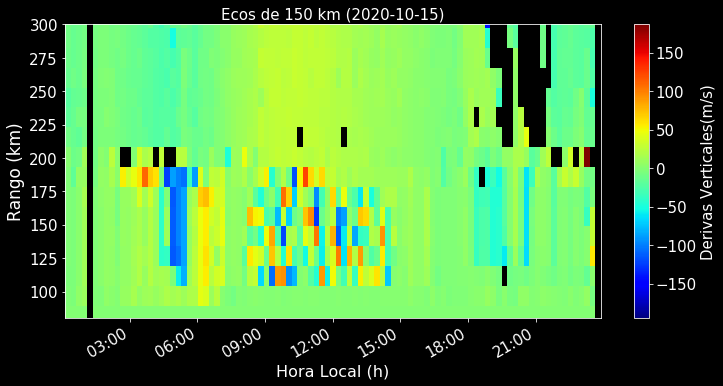

In [48]:
PlotFlag = True
filename = directory + filename1
df = pd.read_csv(filename, delim_whitespace=True)
plot_format = 'png'
rango = df['RANGE']
v_zonal = df['VIPE1']
v_vertical = df['VIPN2']
year = df['YEAR']
month = df['MONTH']
days = df['DAY']
hour = df['HOUR']
minutes = df['MIN']
seconds = df['SEC']
print(len(rango),len(v_vertical), len(seconds))
date_list = [] # list for datetime objects
datetimeFormat = '%Y-%m-%d %H:%M:%S'
time_vector = []
for y, m, d,h, mmins, sec in zip(year,month,days,hour,minutes,seconds):
    date_string = '%d-%02d-%02d %02d:%02d:%02d' % (y,m,d,h,mmins,sec)
    date = datetime.datetime(y,m,d,h,mmins, sec)#, datetimeFormat)
    time_vector.append(date_string)
    date_list.append(date)
    #####################################################################
index = pd.DatetimeIndex(date_list) - timedelta(hours=5)
ran_max = max(rango)
ran_min = min(rango)
range_diff = np.diff(rango)
delta_range = range_diff[0] #valor constante para todo el arreglo
MinRange, MaxRange = ran_min, ran_max#np.max(rango)
#VI72: Ion velocity in direction 7 - Units: m/s
#VI82: Ion velocity in direction 8 - Units: m/s
nrange = int((MaxRange-MinRange)/delta_range + 1)
DataMatrixRows = int((MaxRange-MinRange)/delta_range)+1
ntime = int(len(rango)/(nrange))+1
print(MinRange, MaxRange, delta_range, nrange,ntime, DataMatrixRows)
data_shape = (DataMatrixRows,ntime)

range_array = np.linspace(MinRange, MaxRange, DataMatrixRows)
DataMatrix = np.ones(data_shape)*np.nan
RowInMatrix = np.array((rango-MinRange)/delta_range, dtype=int)
range_array = np.linspace(MinRange, MaxRange, DataMatrixRows)
DataMatrix_v_zonal = np.ones(data_shape)*np.nan
DataMatrix_v_vertical = np.ones(data_shape)*np.nan
string_date = index[0].strftime('%B %d, %Y, %r')
    #line.split()[0]
mes = string_date.split()[0]
month_prime = index[0].month
if mes == 'June':
    mes ='Junio'
if mes == 'July':
    mes = 'Julio'
if mes == 'August':
    mes ='Agosto'
if mes == 'October':
    mes = 'Octubre'
dia = index[0].day
anio = index[0].year
    
dir_plots = 'Plots-150km-%s-%d' % (mes, anio)
col = 0 #counter for current columns
PastRow = 0 #saving past row index
#print("range(rango.size) ",range(rango.size))
for k in range(len(rango)):
    row = RowInMatrix[k] 
# Putting snr in corresponding matrix element
    #print("Verificando índice: ", row, col, k)
    DataMatrix[row,col] = v_vertical[k]
    
    if row<PastRow:
        col += 1
    PastRow = row
data = DataMatrix#[::-1]
datetime_objects = index.to_pydatetime()
if (PlotFlag):
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.style.use('dark_background')
    x_min = mdates.date2num(np.min(index))
    x_max = mdates.date2num(np.max(index))
    #ran_min, ran_max = 60, 300
    extent=[x_min, x_max,ran_min,ran_max]
    
    #clrs = ax.pcolormesh(datetime_objects,range_array,data, cmap='jet')#,vmin=0,vmax=2e11)

    #'''
    im2 = plt.imshow(data, cmap='jet',aspect='auto',interpolation='nearest',origin="lower", extent=extent)
    ax.xaxis_date()
    date_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel("Hora Local (h)", fontsize=16)
    ax.set_ylabel("Rango (km)", fontsize=17)
    fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (anio, month_prime, dia) 
    plt.title(fig_title, fontsize=15)
    # This simply sets the x-axis data to diagonal so it fits better.
    fig.autofmt_xdate()
    ax.set_ylim(80, 300)
    cb2 = fig.colorbar(im2)
    cb2.set_label(r'Derivas Verticales(m/s)', fontsize=15)
    plot_name = '%s/drifts-from-isr-%d-%02d-%02d.%s' % (dir_plots,anio, month_prime, dia, plot_format)
    plt.savefig(plot_name)
    #'''
#YEAR      MONTH     DAY       HOUR      MIN       SEC       
#GDLATR        GDLONR        SPCST         PL   CBADN      
#INTTMS     AZDIR7        ELDIR7        AZDIR8        ELDIR8
#JRO14         JRO15         JRO16         NWLOS         RANGE     
#GDALT      VIPN2         DVIPN2        VIPE1         DVIPE1
#VI72          DVI72         VI82          DVI82         PAIWL
#PACWL         PBIWL         PBCWL         PCIEL         PCCEL
#PDIEL         PDCEL         JRO10         JRO11         
#hf = h5py.File(file_hf5, 'r')
#df.head(1)
#with h5py.File(file_hf5, 'r') as f:
#    g = f.visit(print)
#v_vertical
#plt.plot(rango)

In [46]:
print(range_array[4],range_array[20])

60.0 300.0


In [171]:
def GetMatrixFromTextFile(directory, filename, PlotFlag, plot_format):
    ##########################################################
    ## 2020-06-16: Se verificó que la función trabaja
    ## correctamente. Se creara una nueva para hacer pruebas 
    ## con las dimensiones
    ##########################################################
    filename = directory + filename1
    df = pd.read_csv(filename, delim_whitespace=True)
    rango = df['RANGE']
    v_zonal = df['VIPE1']
    v_vertical = df['VIPN2']
    year = df['YEAR']
    month = df['MONTH']
    days = df['DAY']
    hour = df['HOUR']
    minutes = df['MIN']
    seconds = df['SEC']
    date_list = [] # list for datetime objects
    datetimeFormat = '%Y-%m-%d %H:%M:%S'
    time_vector = []
    for y, m, d,h, mmins, sec in zip(year,month,days,hour,minutes,seconds):
        date_string = '%d-%02d-%02d %02d:%02d:%02d' % (y,m,d,h,mmins,sec)
        date = datetime.datetime(y,m,d,h,mmins, sec)#, datetimeFormat)
        time_vector.append(date_string)
        date_list.append(date)
    #####################################################################
    index = pd.DatetimeIndex(date_list) - timedelta(hours=5)
     ##########################################################
    # Aquí viene la conversión a listas 
    #converted_value = getattr(value, "tolist", lambda: value)()
    days = getattr(days, "tolist", lambda: days)()
    year = getattr(year, "tolist", lambda: year)()
    month = getattr(month, "tolist", lambda: month)()
    hour = getattr(hour, "tolist", lambda: hour)()
    minutes = getattr(minutes, "tolist", lambda: minutes)()
    seconds = getattr(seconds, "tolist", lambda: seconds)()
    rango = getattr(rango, "tolist", lambda: rango)()
    ###########################################################
    ran_max = max(rango)
    ran_min = min(rango)
    #rang_list = list(rango)
    max_index = rango.index(ran_max)
    min_index = rango.index(ran_min)
    range_diff = np.diff(rango)
    delta_range = range_diff[0] #valor constante para todo el arreglo
    MinRange, MaxRange = np.min(rango), ran_max#np.max(rango)
    DataMatrixRows = int((MaxRange-MinRange)/delta_range)
    data_shape = (DataMatrixRows+1,len(index))

    range_array = np.linspace(MinRange, MaxRange, DataMatrixRows+1)
    DataMatrix = np.ones(data_shape)*np.nan
    RowInMatrix = np.array((rango-MinRange)/delta_range, dtype=int)
    range_array = np.linspace(MinRange, MaxRange, DataMatrixRows+1)
    RangeMatrix = np.ones(data_shape)*np.nan
    DataMatrix_v_zonal = np.ones(data_shape)*np.nan
    DataMatrix_v_vertical = np.ones(data_shape)*np.nan
    
    string_date = index[0].strftime('%B %d, %Y, %r')
    #line.split()[0]
    mes = string_date.split()[0]
    month_prime = index[0].month
    if mes == 'June':
        mes ='Junio'
    if mes == 'July':
        mes = 'Julio'
    if mes == 'August':
        mes ='Agosto'
    if mes == 'October':
        mes = 'Octubre'
    dia = index[0].day
    anio = index[0].year
    
    dir_plots = 'Plots-150km-%s-%d' % (mes, anio)
    col = 0 #counter for current columns
    PastRow = 0 #saving past row index
    #print("range(rango.size) ",range(rango.size))
    for k in range(len(rango)):
        row = RowInMatrix[k] 
    # Putting snr in corresponding matrix element
        DataMatrix[row,col] = v_vertical[k]
        if row<PastRow:
            col += 1
        PastRow = row
    data = DataMatrix#[::-1]
    datetime_objects = index.to_pydatetime()
    #######################################################################################################
    if (PlotFlag):
        fig, ax = plt.subplots(figsize=(12, 6))
        #plt.rcParams['xtick.labelsize']=14
        #ran_min, ran_max = 90, 180
        plt.style.use('dark_background')
        #x_min = mdates.date2num(np.min(index))
        #x_max = mdates.date2num(np.max(index))
        #extent=[x_min, x_max,ran_min,ran_max]
        clrs = ax.pcolormesh(datetime_objects,rango,v_vertical, cmap='jet')#,vmin=0,vmax=2e11)

#ax.set_ylim([100,400])
        fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (day_index[0].year, day_index[0].month, day_index.day[0]) 
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.set_xlabel('Hora Local', fontsize=20)
        ax.set_ylabel('Altitud (km)', fontsize=20)
        ax.set_title(fig_title, fontsize=20)

        box=ax.get_position()
        cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
        cb=plt.colorbar(clrs,cax=cbarax)
        cb.set_label('Velocidad vertical (ms)', fontsize=20)
        #clrs = ax.pcolormesh(datetime_objects[ind0:indf],rango2D,v_vertical.T[:,ind0:indf], cmap='jet')#,vmin=0,vmax=2e11)

#ax.set_ylim([100,400])

        #plt.savefig('new-plots-vertical-drift-%d-%02d-%02d.png' % (day_index[0].year, day_index[0].month, day_index.day[0]))
        '''
        im2 = plt.imshow(data.T, cmap='jet',aspect='auto',interpolation='nearest',origin="lower", extent=extent)
        ax.xaxis_date()
        date_format = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(date_format)
        ax.set_xlabel("Hora Local (h)", fontsize=16)
        ax.set_ylabel("Rango (km)", fontsize=17)
        fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (anio, month_prime, dia) 
        plt.title(fig_title, fontsize=15)
        # This simply sets the x-axis data to diagonal so it fits better.
        fig.autofmt_xdate()
        cb2 = fig.colorbar(im2)
        cb2.set_label(r'$log_{10}SNR$', fontsize=17)
        #plt.savefig(r'ESF-no-labels-%d-%02d-%02d.png' % (year[0], month[0], days[0]))
        plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-SNR.%s' % (dir_plots,anio, month_prime, dia, plot_format))
        #plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-SNR.png' % (dir_plots,anio, month_prime, dia))
        plt.show()
        plt.close(fig)
        '''
    #####################################################################################
        '''
        fig, ax = plt.subplots(figsize=(12, 6))
        #plt.rcParams['xtick.labelsize']=14
        plt.style.use('dark_background')
        im3 = plt.imshow(v_vertical.T, cmap='jet',aspect='auto',interpolation='nearest',origin="lower", extent=extent)

        ax.xaxis_date()
        date_format = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(date_format)
        ax.set_xlabel("Hora Local (h)", fontsize=16)
        ax.set_ylabel("Rango (km)", fontsize=17)
        fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (anio, month_prime, dia) 
        plt.title(fig_title, fontsize=15)
        # This simply sets the x-axis data to diagonal so it fits better.
        fig.autofmt_xdate()
        cb3 = fig.colorbar(im3)
        cb3.set_label(r'Velocidad vertical (m/s)', fontsize=15)
        #plt.savefig(r'ESF-no-labels-%d-%02d-%02d.png' % (year[0], month[0], days[0]))
        plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-v-vertical.%s' % (dir_plots,anio, month_prime, dia, plot_format))
        #plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-SNR.png' % (dir_plots,anio, month_prime, dia))
        plt.show()
        plt.close(fig)   
    #####################################################################################
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.style.use('dark_background')
        #plt.rcParams['xtick.labelsize']=14
        im4 = plt.imshow(v_zonal.T, cmap='jet',aspect='auto',interpolation='nearest',origin="lower", extent=extent)
        ax.xaxis_date()
        date_format = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(date_format)
        ax.set_xlabel("Hora Local (h)", fontsize=16)
        ax.set_ylabel("Rango (km)", fontsize=17)
        fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (anio, month_prime, dia) 
        plt.title(fig_title, fontsize=15)
        # This simply sets the x-axis data to diagonal so it fits better.
        fig.autofmt_xdate()
        cb4 = fig.colorbar(im4)
        cb4.set_label(r'Velocidad zonal (m/s)', fontsize=15)
        #plt.savefig(r'ESF-no-labels-%d-%02d-%02d.png' % (year[0], month[0], days[0]))
        plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-v-zonal.%s' % (dir_plots,anio, month_prime, dia, plot_format))
        #plt.savefig(r'%s/ecos-150km-%d-%02d-%02d-SNR.png' % (dir_plots,anio, month_prime, dia))
        plt.show()
        plt.close(fig)   
        '''
    return  data, index, range_array, rango, dir_plots, time_vector, v_zonal, v_vertical

In [172]:
datetime_str = '2020-08-01 13:55:26'
datetime_object = datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')



ValueError: not enough values to unpack (expected 2, got 1)

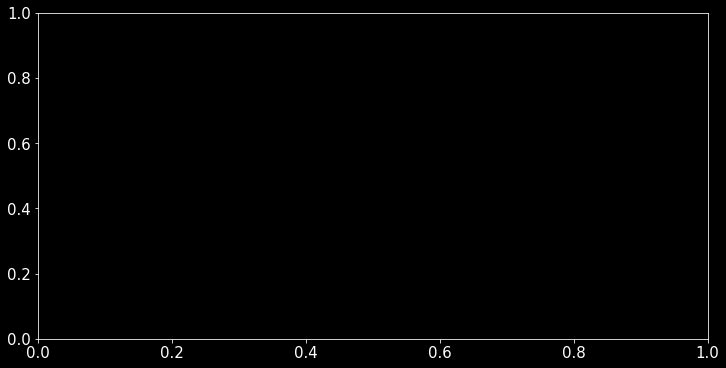

In [173]:
PlotFlag = True
data ,snl, day_index, range_array, rango, dir_plots, time_vector, v_zonal = GetMatrixFromTextFile(directory, filename1, PlotFlag, 'png')
#print(data.shape, len(snl), day_index.shape, range_array.shape, len(rango))
print("Vertical Drifts: ", v_vertical.shape)
print(type(v_vertical.T))

In [33]:
#print(timestamps[0])
str_t0 = '2020-%02d-%02d 09:00:00' % (day_index[0].month, day_index[0].day)
str_tf = '2020-%02d-%02d 17:00:00' % (day_index[0].month, day_index[0].day)

t0 = datetime.datetime.strptime(str_t0, '%Y-%m-%d %H:%M:%S')
tf = datetime.datetime.strptime(str_tf, '%Y-%m-%d %H:%M:%S')
i = 0
ind0 = 0
indf = -1
datetime_objects = [] 
for ts in timestamps:
    #datetime_objects.append(datetime.timestamp(ts))
    dt = datetime.datetime.fromtimestamp(ts)
    datetime_objects.append(dt)
    if (dt >= t0):
        #print('9 AM!', i)
        ind0=i
        continue
    if (dt >= tf):
        #print('5 PM!')
        indf=i
    i = i + 1
    
    #if indf == 0:
    #    inf
print("índices iniciales y finales:", ind0, indf)
print(datetime_objects[-1])
print(datetime_objects[ind0])

índices iniciales y finales: 23 -1
2020-08-01 16:55:22
2020-08-01 09:00:24


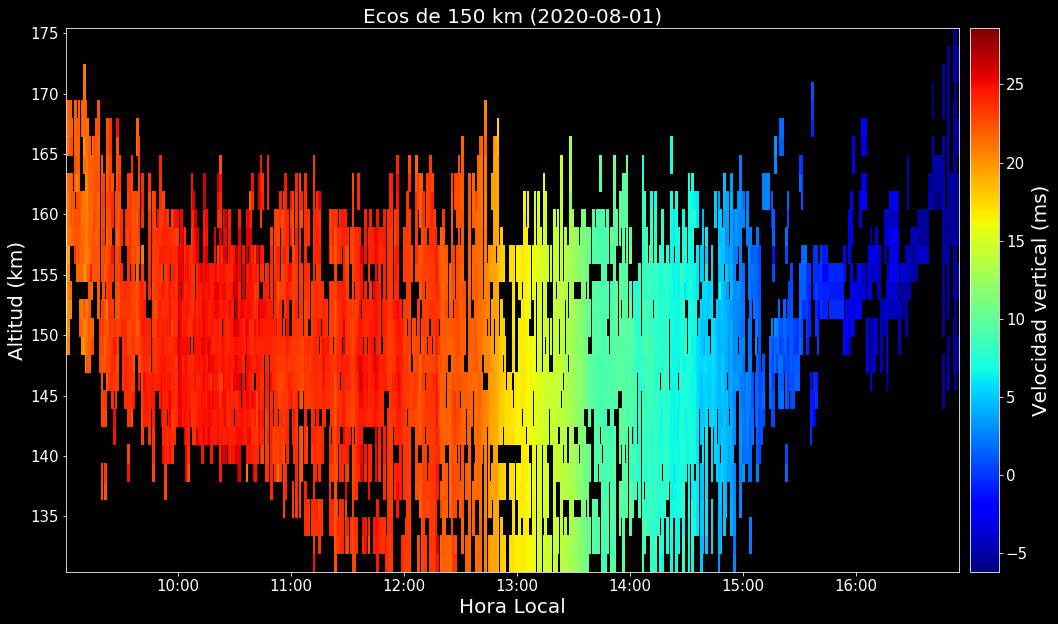

In [34]:
#fig,ax=plt.subplots(1,1)
fig, ax = plt.subplots(figsize=(16, 10))
#plt.rcParams['xtick.labelsize']=14
        
plt.style.use('dark_background')
#clrs = ax.pcolormesh(mdates.date2num(bdat['time']),bdat['altitude'],bdat['ne'],vmin=0,vmax=2e11)
#clrs = ax.pcolormesh(datetime_objects,rango2D,v_vertical.T, cmap='jet')#,vmin=0,vmax=2e11)
clrs = ax.pcolormesh(datetime_objects[ind0:indf],rango2D,v_vertical.T[:,ind0:indf], cmap='jet')#,vmin=0,vmax=2e11)

#ax.set_ylim([100,400])
fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (day_index[0].year, day_index[0].month, day_index.day[0]) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Hora Local', fontsize=20)
ax.set_ylabel('Altitud (km)', fontsize=20)
ax.set_title(fig_title, fontsize=20)

box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)
cb.set_label('Velocidad vertical (ms)', fontsize=20)
plt.savefig('new-plots-vertical-drift-%d-%02d-%02d.png' % (day_index[0].year, day_index[0].month, day_index.day[0]))

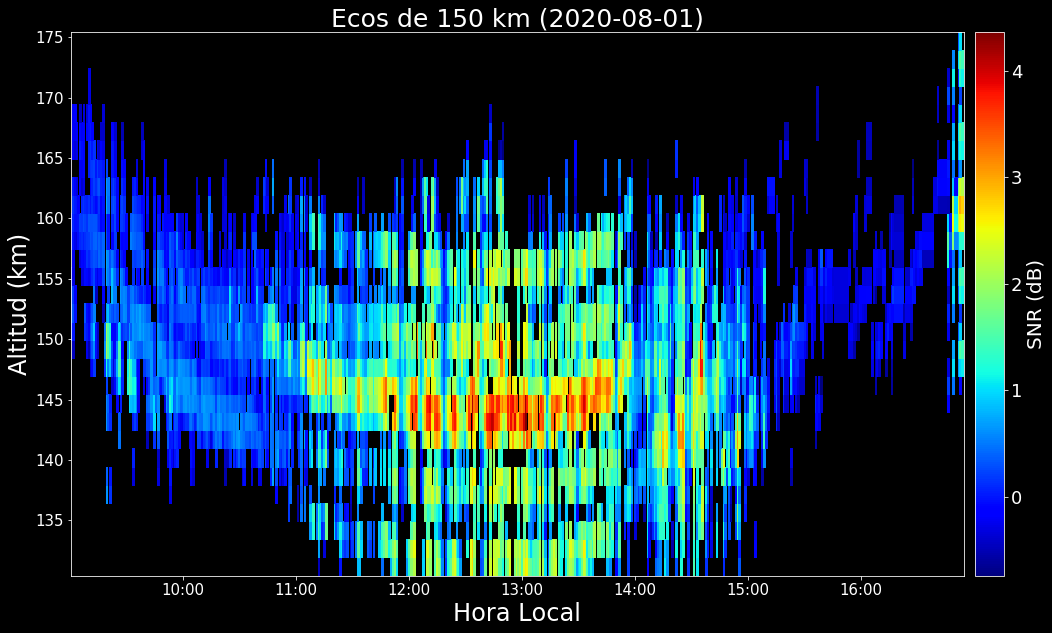

In [35]:
#fig,ax=plt.subplots(1,1)
fig, ax = plt.subplots(figsize=(16, 10))
#plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18       
plt.style.use('dark_background')
#clrs = ax.pcolormesh(mdates.date2num(bdat['time']),bdat['altitude'],bdat['ne'],vmin=0,vmax=2e11)
#clrs = ax.pcolormesh(datetime_objects,rango2D,v_vertical.T, cmap='jet')#,vmin=0,vmax=2e11)
clrs = ax.pcolormesh(datetime_objects[ind0:indf],rango2D,snl2.T[:,ind0:indf], cmap='jet')#,vmin=0,vmax=2e11)

#ax.set_ylim([100,400])
fig_title = r'Ecos de 150 km (%d-%02d-%02d)' % (day_index[0].year, day_index[0].month, day_index.day[0]) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Hora Local', fontsize=24)
ax.set_ylabel('Altitud (km)', fontsize=24)
ax.set_title(fig_title, fontsize=25)

box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)
cb.set_label('SNR (dB)', fontsize=20)
plt.savefig('new-plots-snr-vertical-drift-%d-%02d-%02d.pdf' % (day_index[0].year, day_index[0].month, day_index.day[0]))

In [36]:
prev_times = [' ']
k = 0
for time in day_index:
    if prev_times[k] == time:
           print('Same Time')
    else:
        #print 'Different time'
        if not time in prev_times:
            prev_times.append(time)
        prev_time = time


prev_times = prev_times[1:]
num_diff_times = len(prev_times)
print(num_diff_times)

491


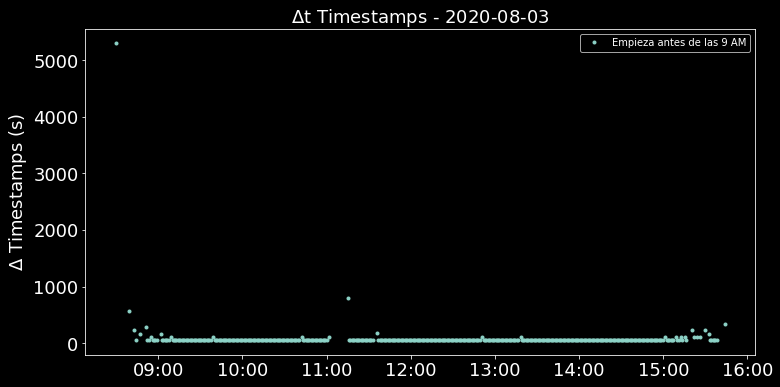

In [11]:
diff1 = np.diff(datetime_objects[ind0:])
diff2 = np.diff(datetime_objects)

secs1 = []
secs2 = []
for d1 in diff1:
    secs1.append(d1.seconds)
for d2 in diff2:
    secs2.append(d2.seconds)

#plt.hist(secs)
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
#plt.plot(datetime_objects[1:],secs2, label='Empieza antes de las 9 AM')
plt.plot(datetime_objects[1:],secs2, '.',label='Empieza antes de las 9 AM')

#plt.plot(secs1, label='> 9 AM')
fig_title = r'$\Delta$t Timestamps - %d-%02d-%02d' % (day_index[0].year, day_index[0].month, day_index[0].day) 
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel(r'$\Delta$ Timestamps (s)', fontsize=18)
#axs.set_xlim([10
plt.legend()
plt.savefig('delta-timestamps-vs-tiempo-%d-%02d-%02d.%s' % (day_index[0].year, day_index[0].month, day_index[0].day, str_format))

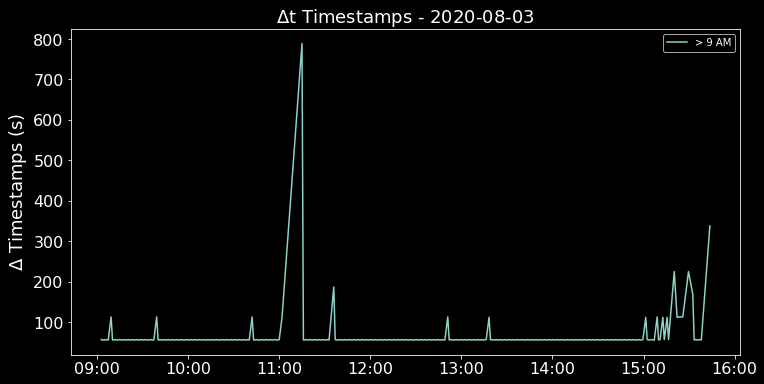

In [12]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.plot(datetime_objects[ind0+1:],secs1, label='> 9 AM')
fig_title = "Número de Timestamps - Agosto 2020"
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

fig_title = r'$\Delta$t Timestamps - %d-%02d-%02d' % (day_index[0].year, day_index[0].month, day_index[0].day) 
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel(r'$\Delta$ Timestamps (s)', fontsize=18)
#axs.set_xlim([10
plt.legend()
plt.savefig('nueve-delta-timestamps-vs-tiempo-%d-%02d-%02d.%s' % (day_index[0].year, day_index[0].month, day_index[0].day, str_format))

In [13]:
print(len(secs1), diff2.shape)

387 (401,)


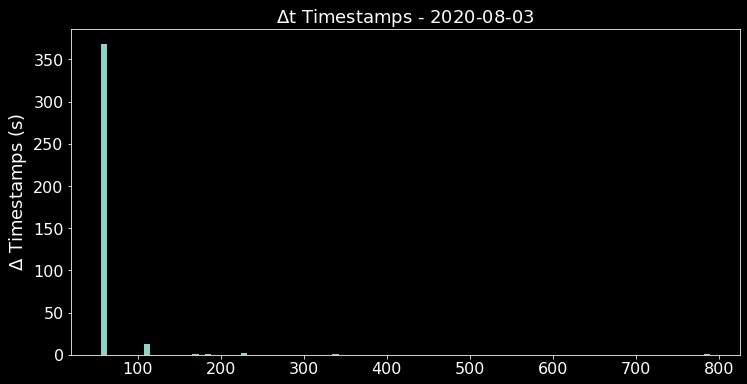

In [14]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.hist(secs1, bins=100)#, label='> 9 AM')
fig_title = "Número de Timestamps - Agosto 2020"
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

fig_title = r'$\Delta$t Timestamps - %d-%02d-%02d' % (day_index[0].year, day_index[0].month, day_index[0].day) 
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

#axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel(r'$\Delta$ Timestamps (s)', fontsize=18)
#axs.set_xlim([10
#plt.legend()
plt.savefig('delta-timestamps-histogram-%d-%02d-%02d.%s' % (day_index[0].year, day_index[0].month, day_index[0].day, str_format))


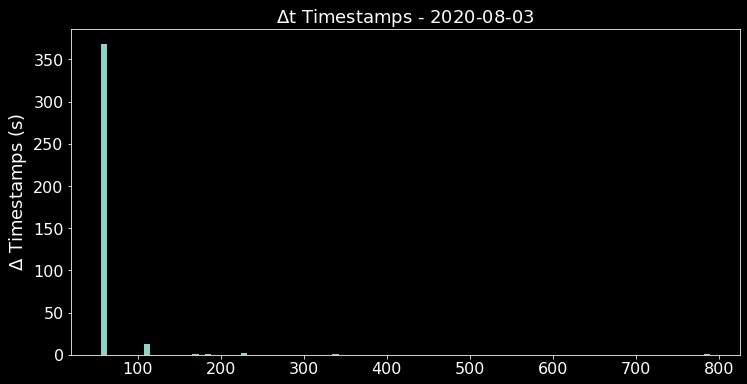

In [15]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.hist(secs1, bins=100)#, label='> 9 AM')
fig_title = "Número de Timestamps - Agosto 2020"
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

fig_title = r'$\Delta$t Timestamps - %d-%02d-%02d' % (day_index[0].year, day_index[0].month, day_index[0].day) 
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

#axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel(r'$\Delta$ Timestamps (s)', fontsize=18)
#axs.set_xlim([10
#plt.legend()
plt.savefig('delta-timestamps-histogram-%d-%02d-%02d.%s' % (day_index[0].year, day_index[0].month, day_index[0].day, str_format))

In [16]:
#print(max(h_max), min(h_min), (max(h_max)-min(h_min))/len(h_max))

In [17]:
#rango[1]-rango[0]

In [18]:
#rango[2]-rango[1]

In [19]:
#((rango[0]-rango[-1])/len(rango))**(-1)

In [20]:
#rango2D[1]-rango2D[0]

### Monthly stuff

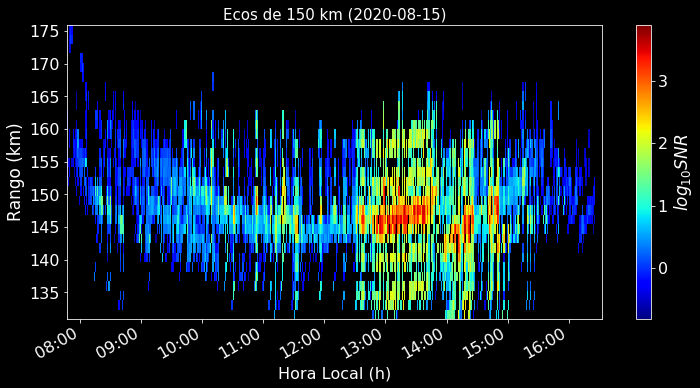

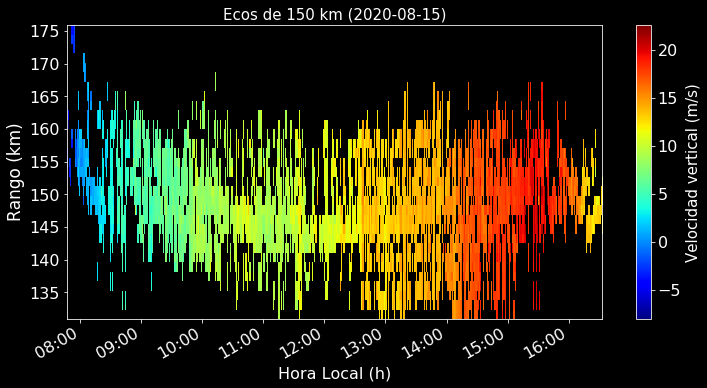

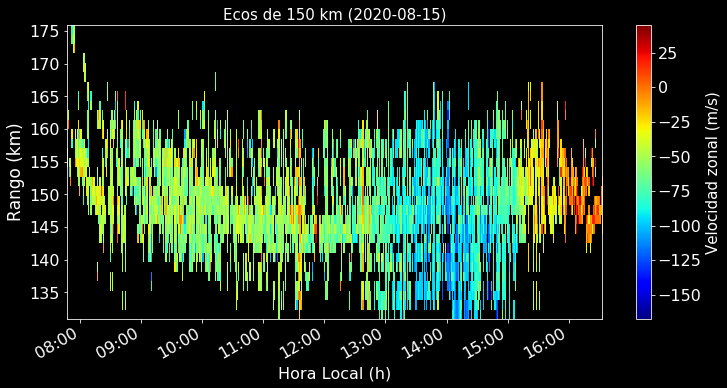

479
Vertical Average shape:  (479,) (479,) 2020-08-15 07:46:55 2020-08-15 16:33:04


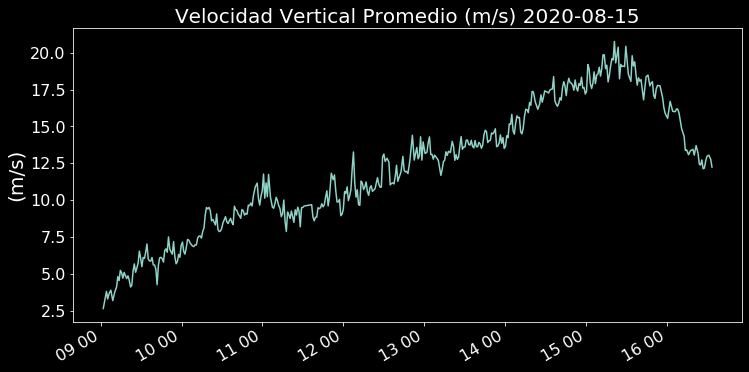

Range array shape:  (4795,)


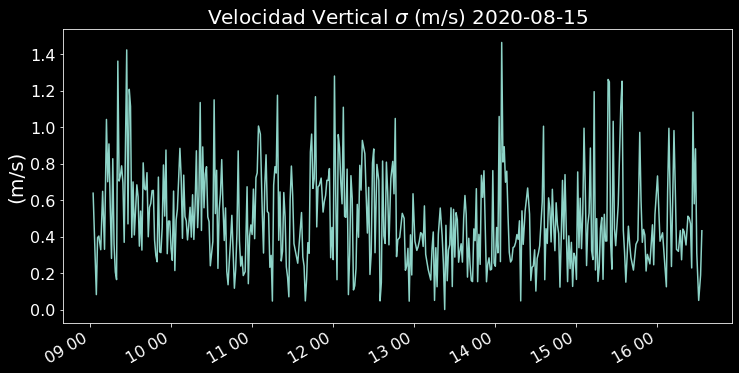

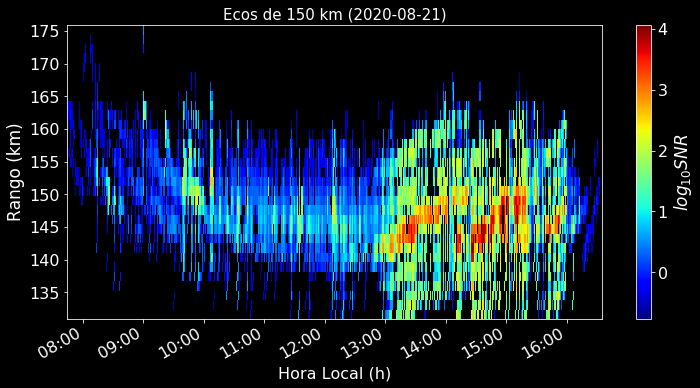

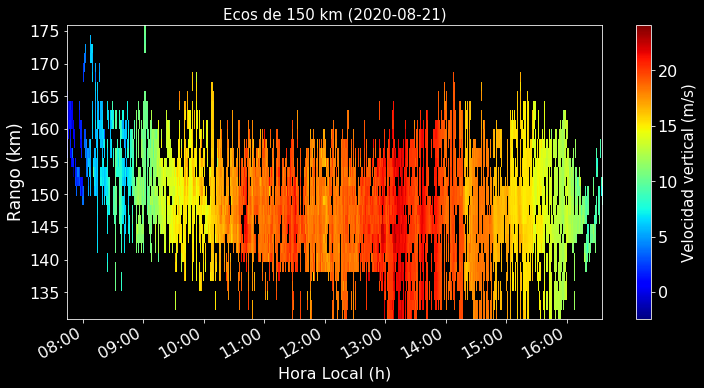

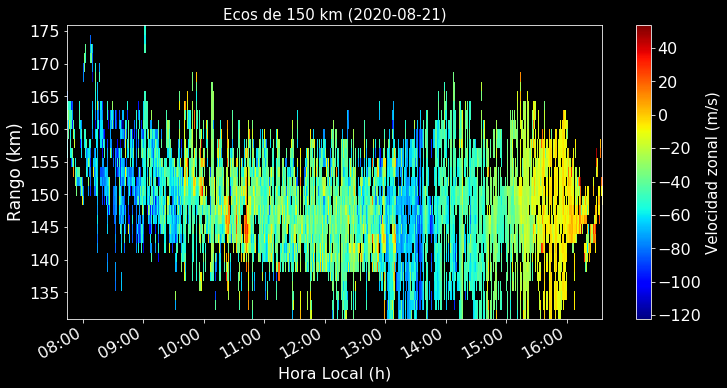

512
Vertical Average shape:  (512,) (512,) 2020-08-21 07:43:59 2020-08-21 16:35:18


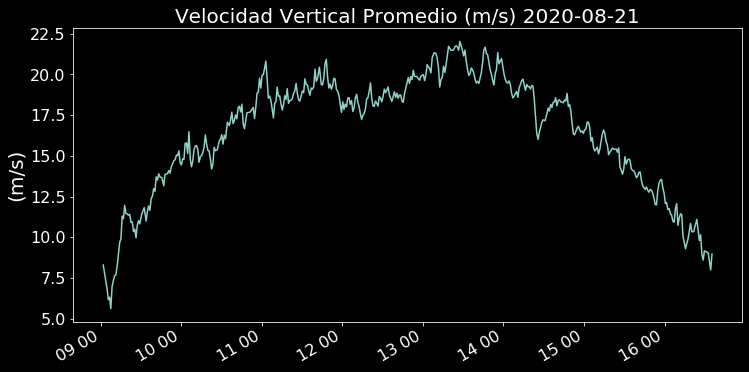

Range array shape:  (5831,)


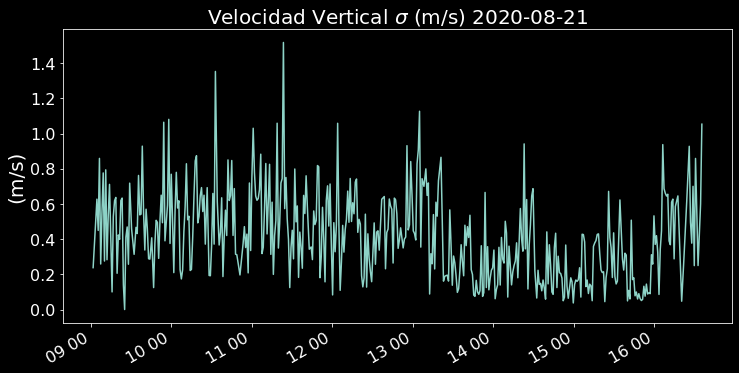

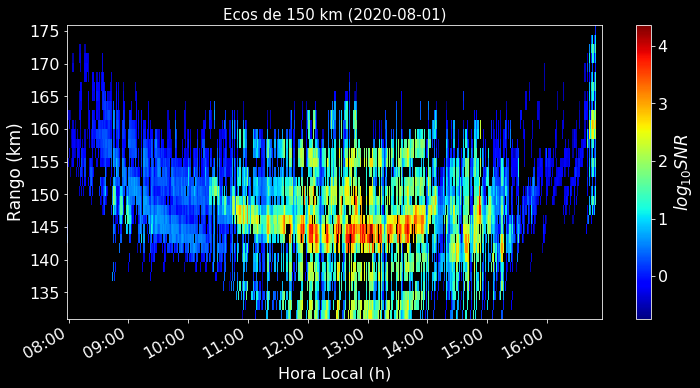

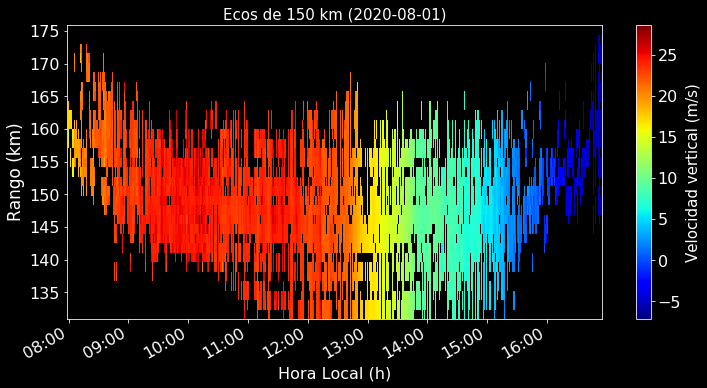

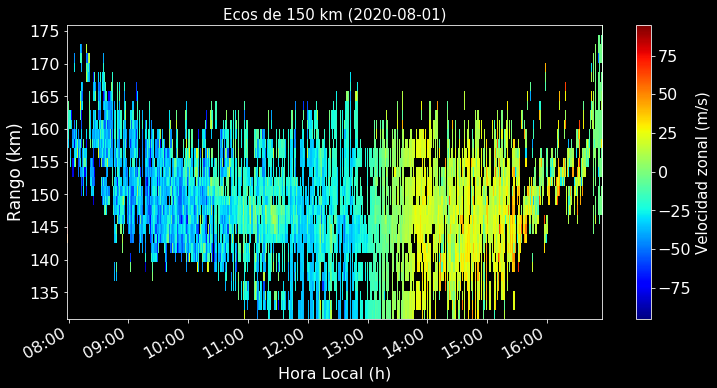

491
Vertical Average shape:  (491,) (491,) 2020-08-01 07:57:58 2020-08-01 16:55:50


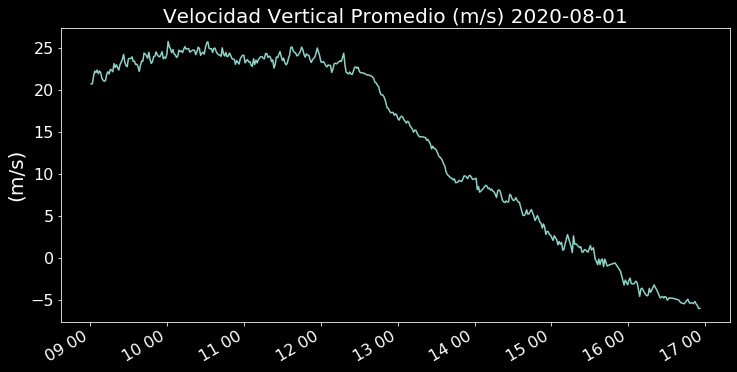

Range array shape:  (5674,)


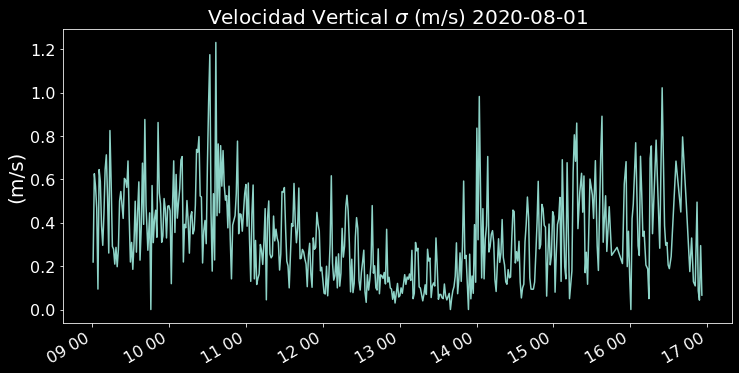

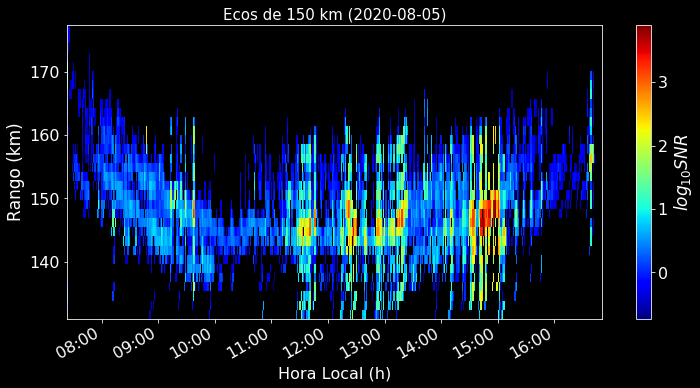

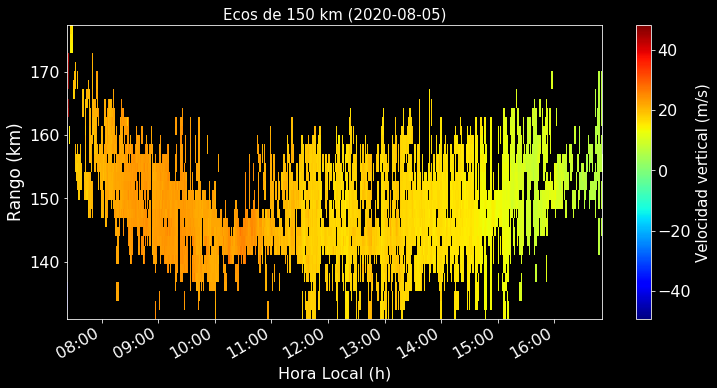

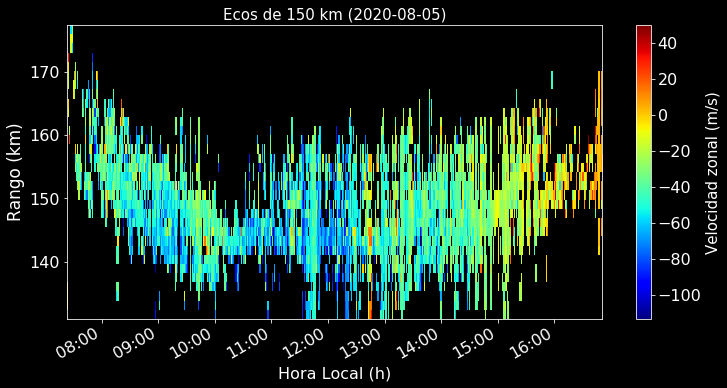

468
Vertical Average shape:  (468,) (468,) 2020-08-05 07:23:05 2020-08-05 16:50:58


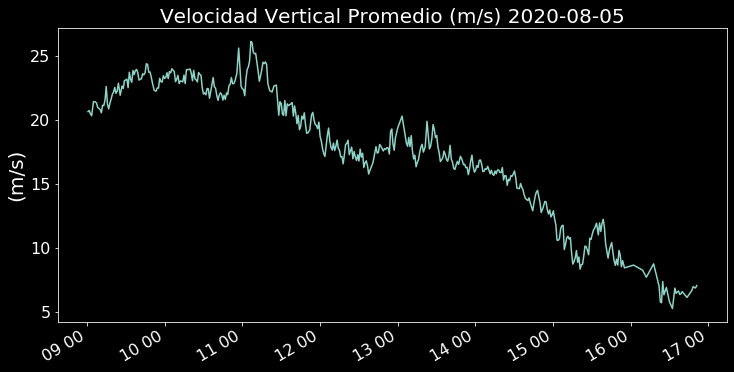

Range array shape:  (4749,)


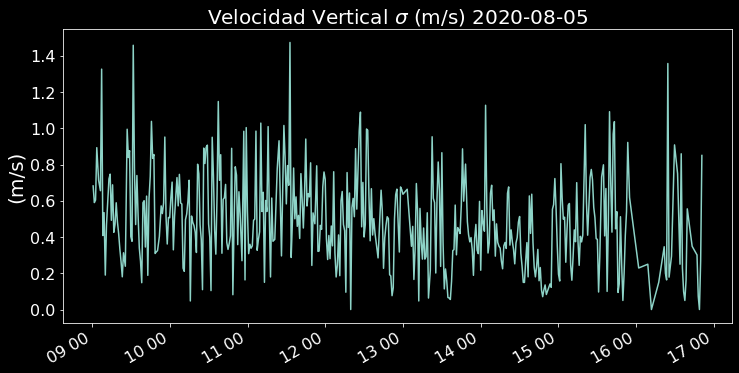

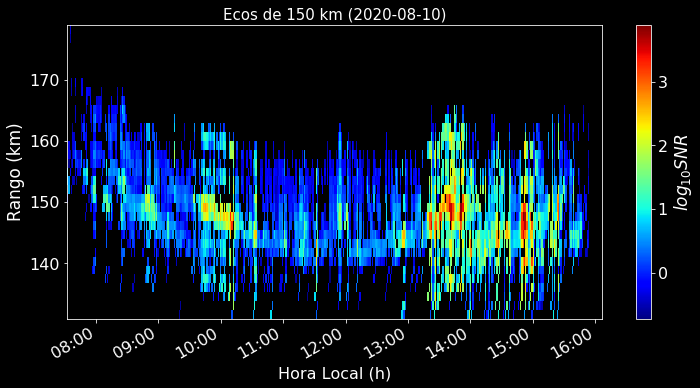

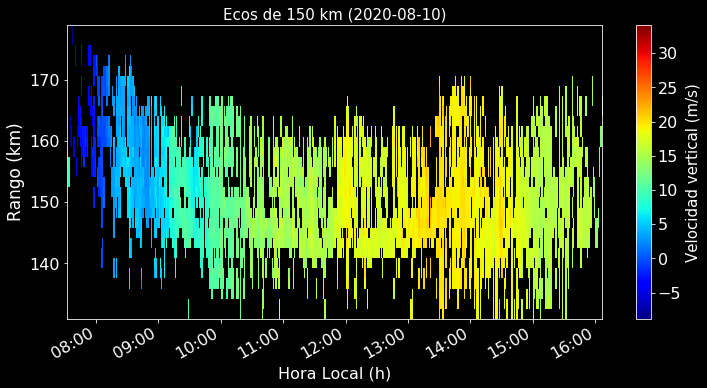

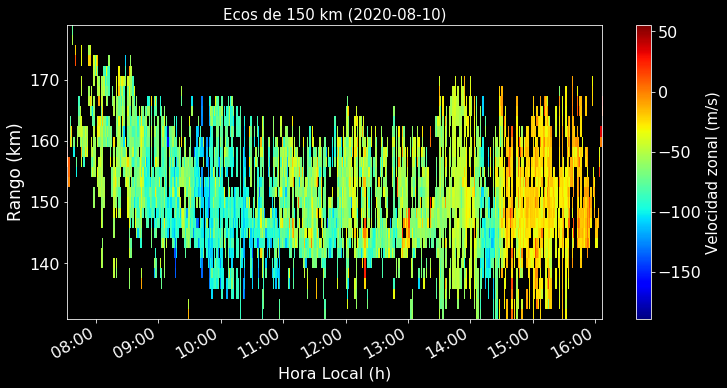

427
Vertical Average shape:  (427,) (427,) 2020-08-10 07:31:57 2020-08-10 16:06:48


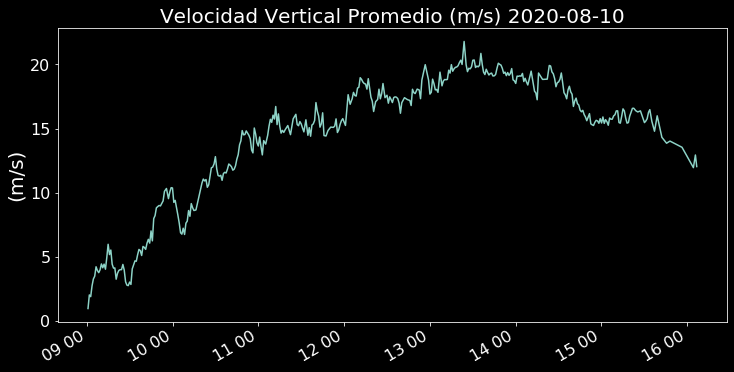

Range array shape:  (4547,)


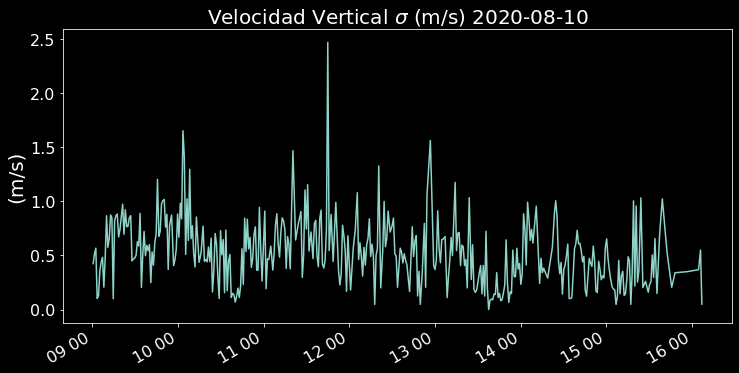

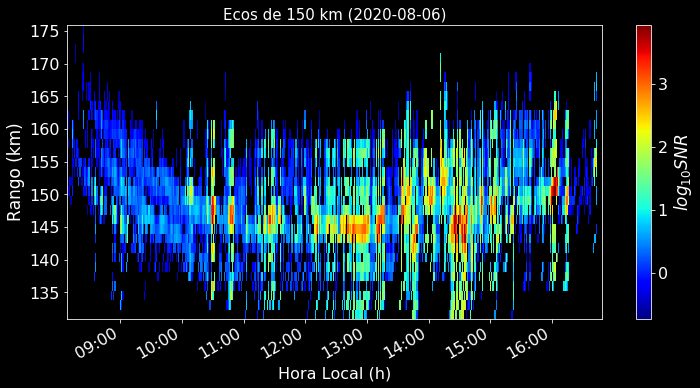

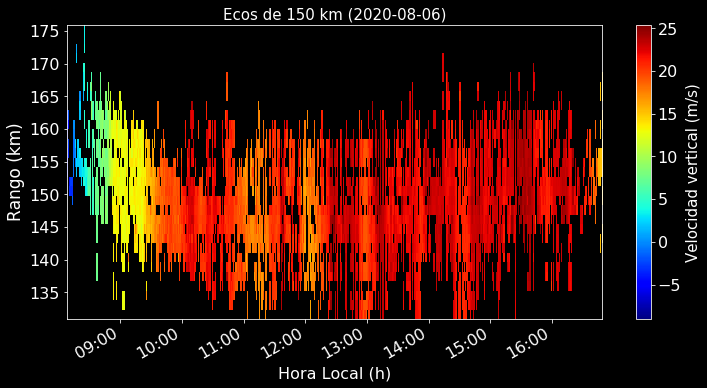

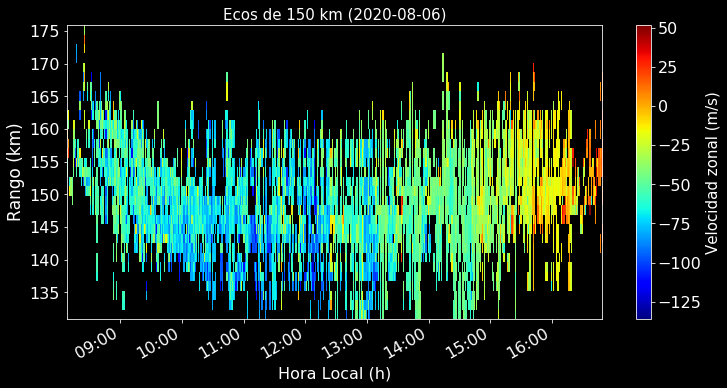

474
Vertical Average shape:  (474,) (474,) 2020-08-06 08:07:43 2020-08-06 16:49:10


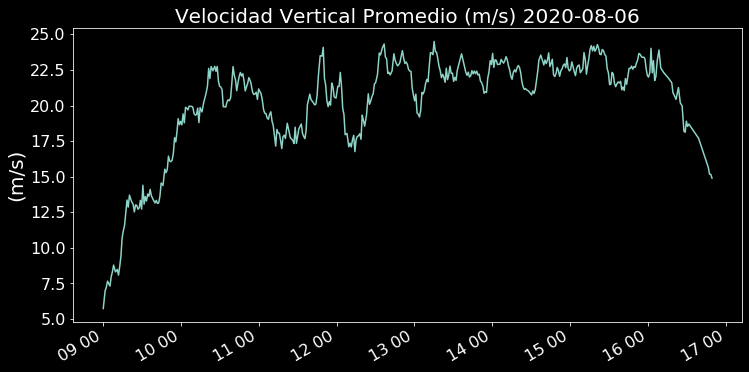

Range array shape:  (5322,)


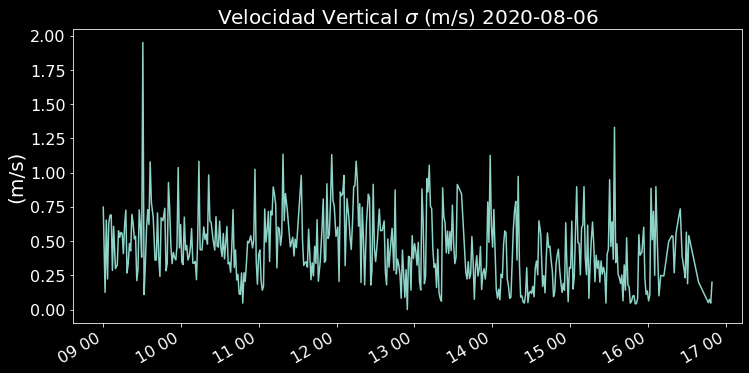

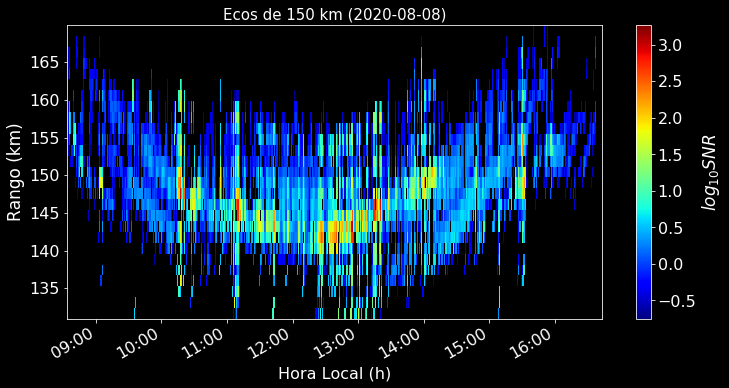

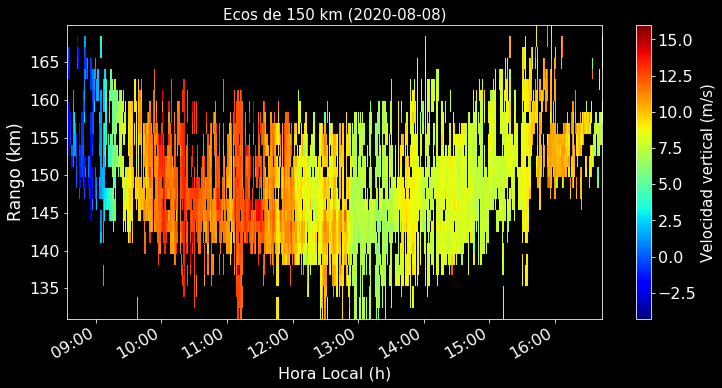

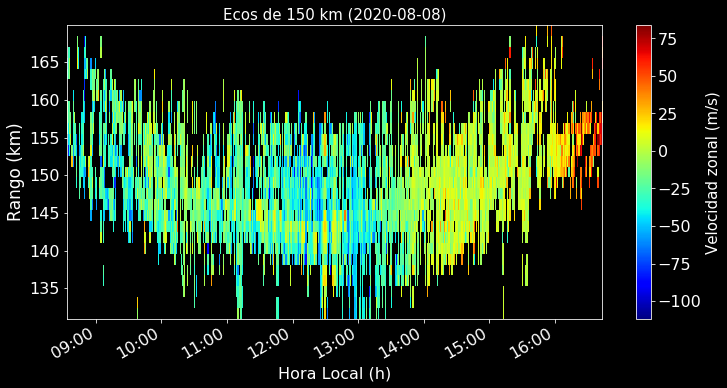

481
Vertical Average shape:  (481,) (481,) 2020-08-08 08:33:20 2020-08-08 16:43:19


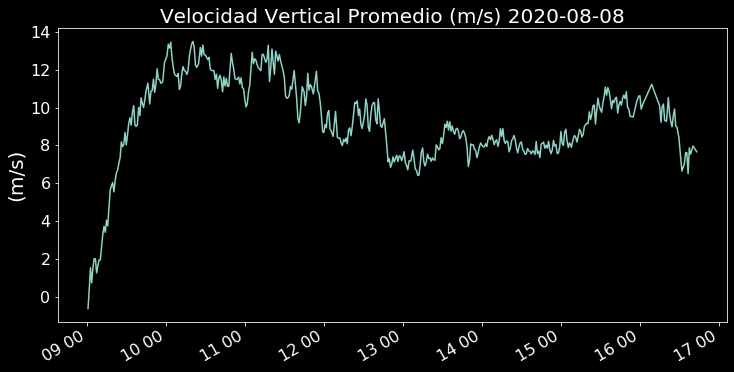

Range array shape:  (4799,)


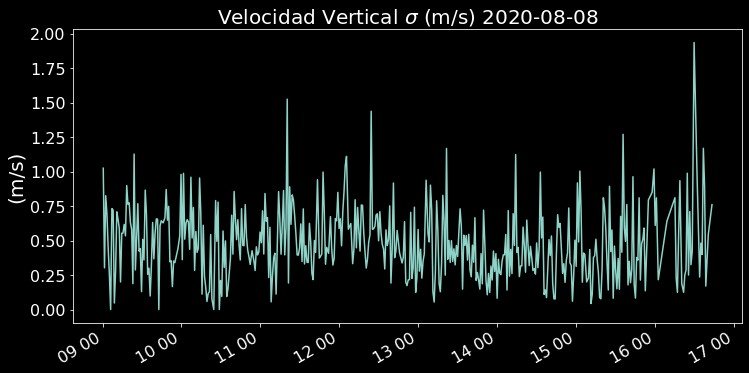

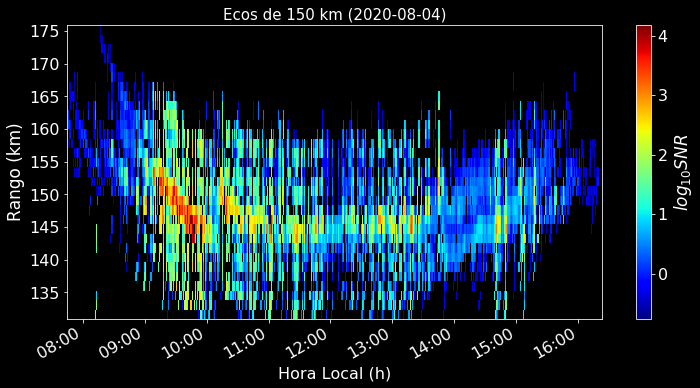

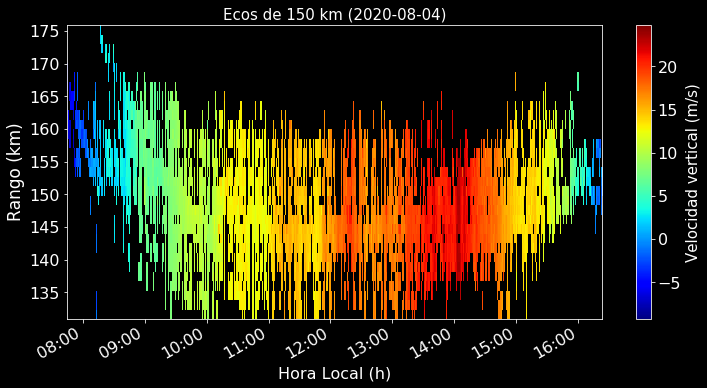

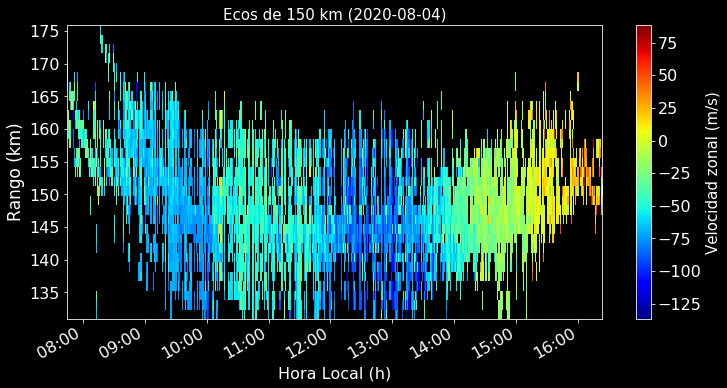

482
Vertical Average shape:  (482,) (482,) 2020-08-04 07:44:36 2020-08-04 16:23:15


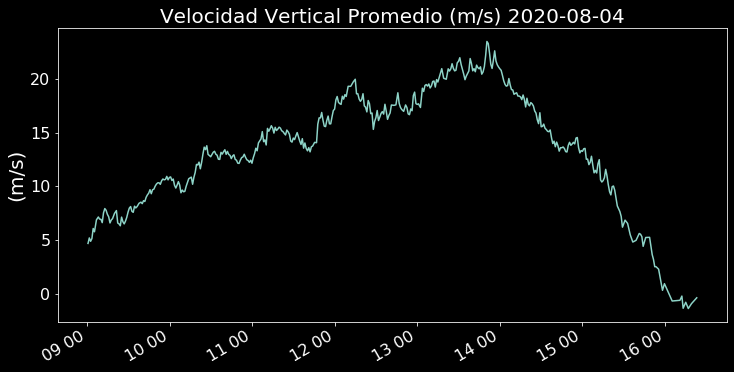

Range array shape:  (5437,)


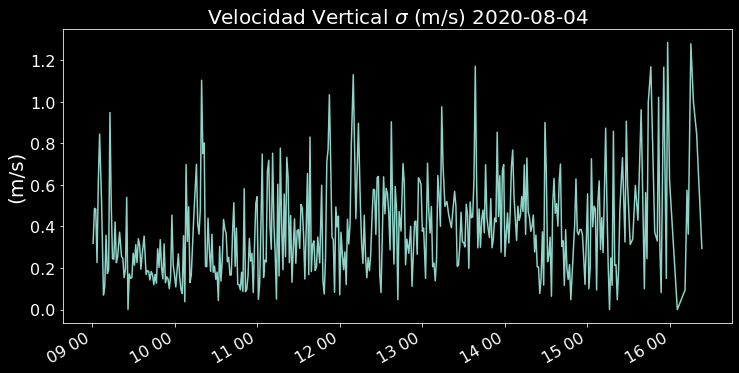

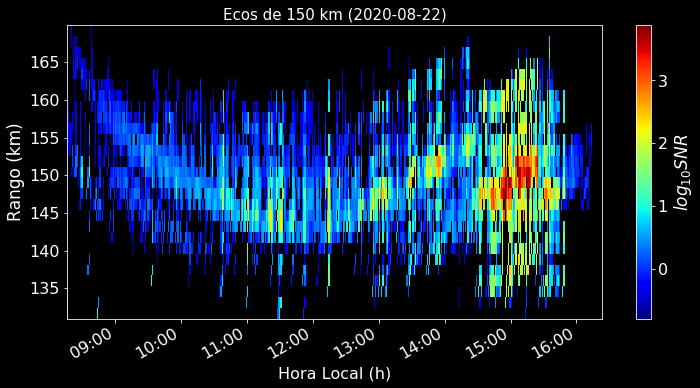

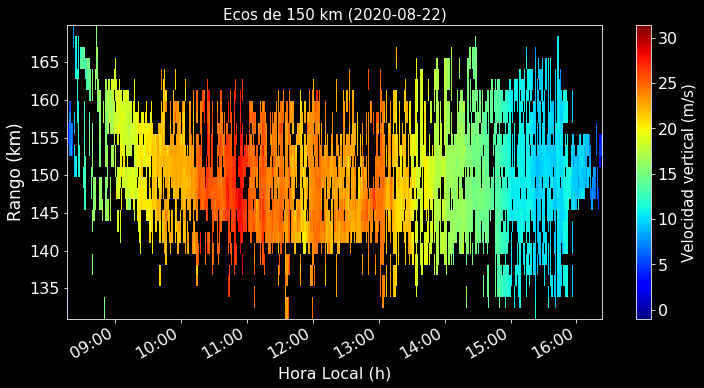

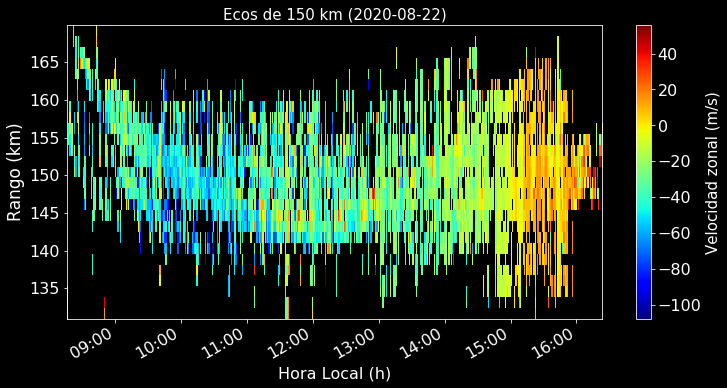

447
Vertical Average shape:  (447,) (447,) 2020-08-22 08:15:58 2020-08-22 16:23:37


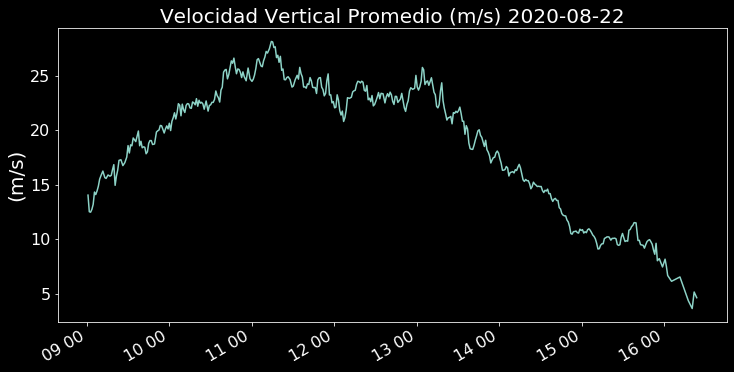

Range array shape:  (4556,)


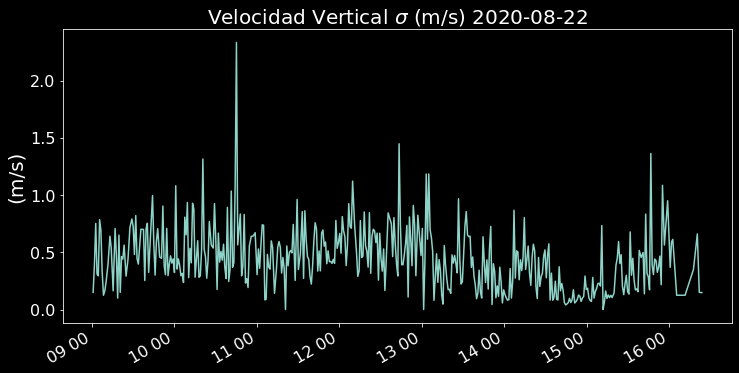

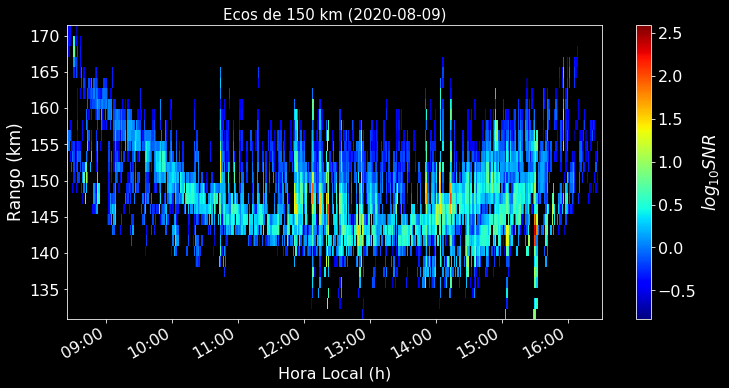

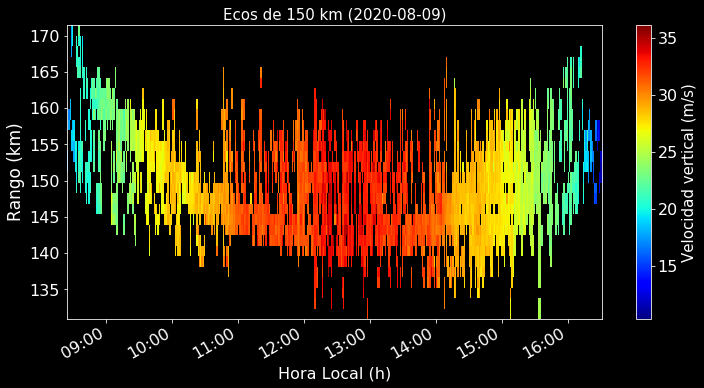

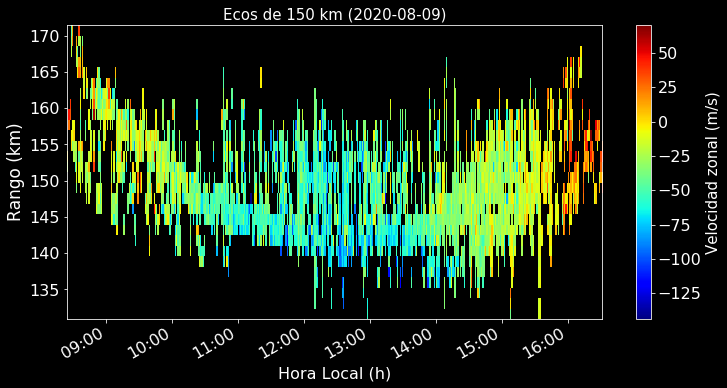

427
Vertical Average shape:  (427,) (427,) 2020-08-09 08:24:00 2020-08-09 16:31:38


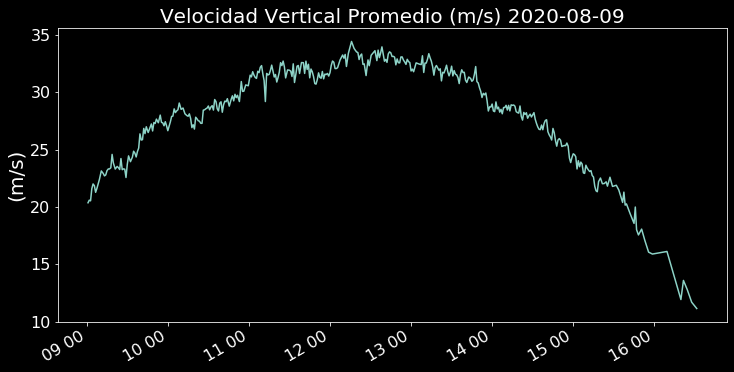

Range array shape:  (3524,)


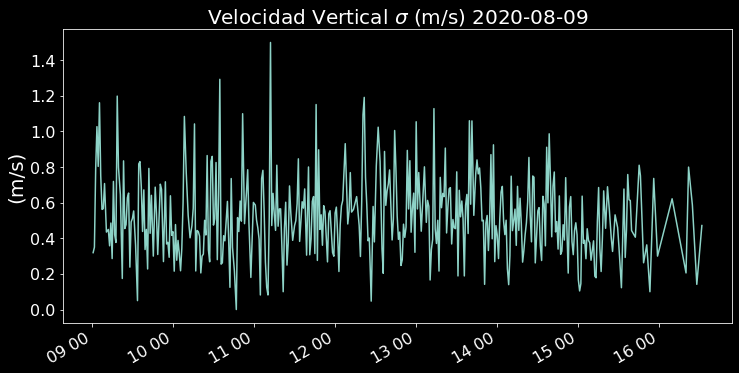

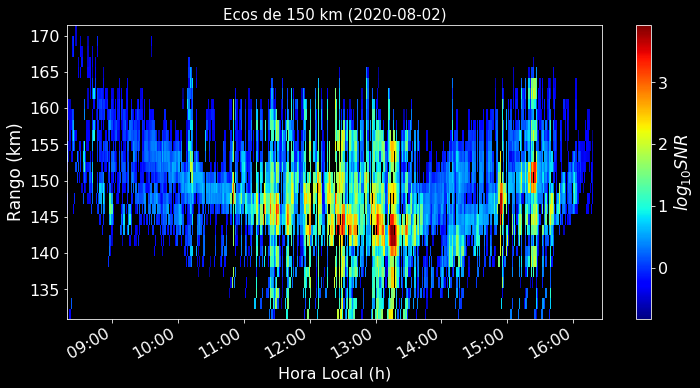

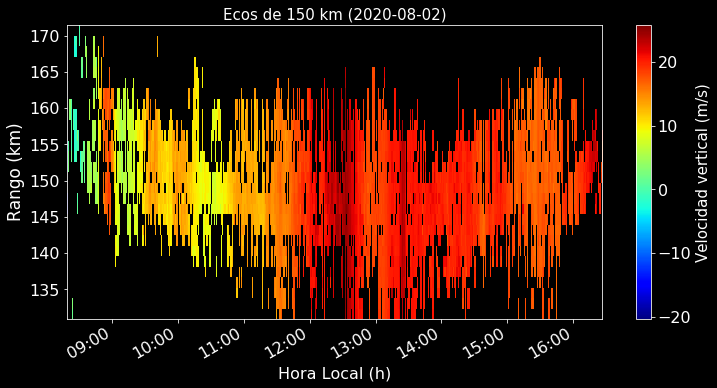

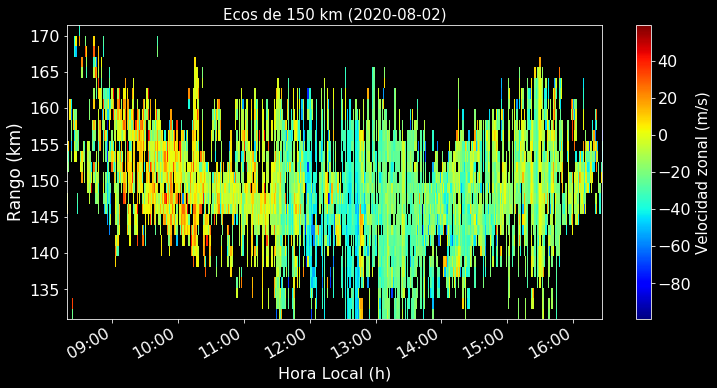

446
Vertical Average shape:  (446,) (446,) 2020-08-02 08:18:50 2020-08-02 16:26:28


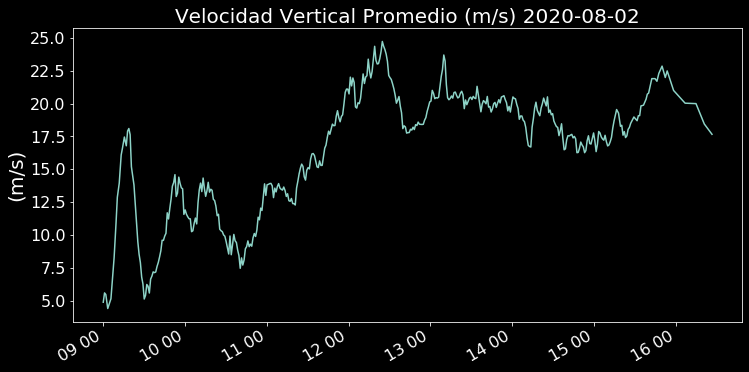

Range array shape:  (4899,)


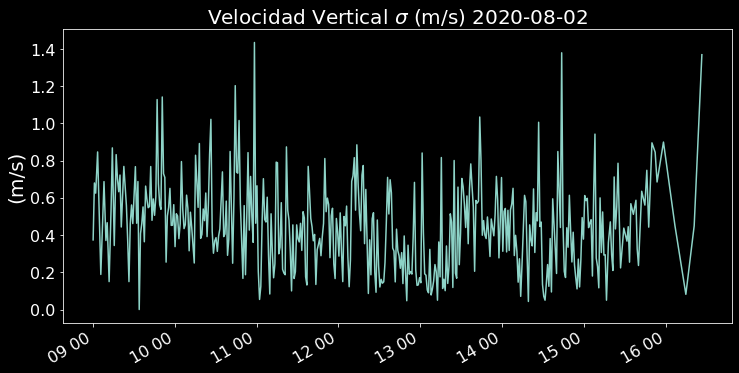

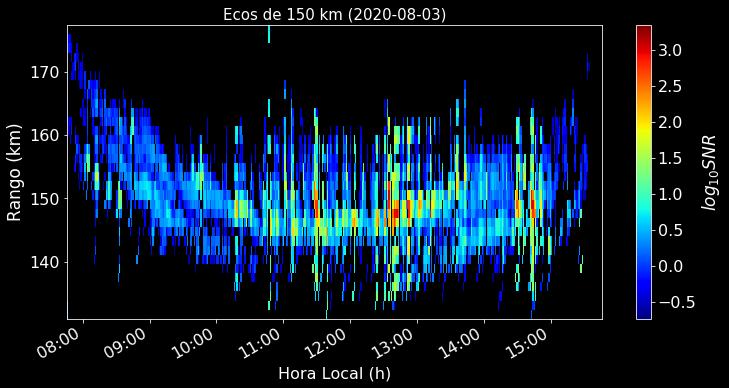

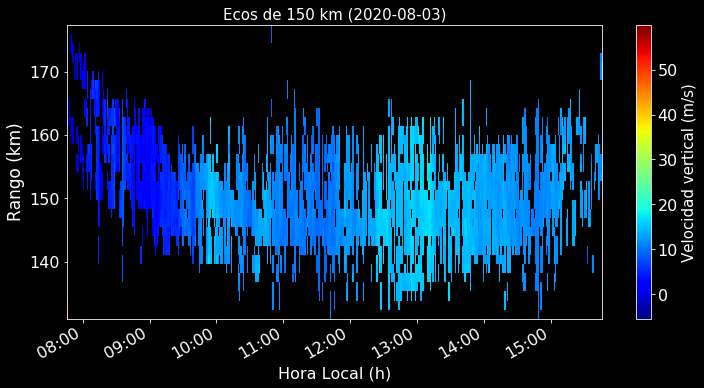

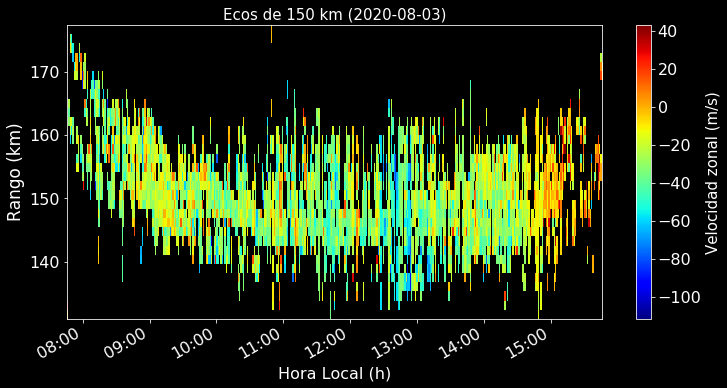

402
Vertical Average shape:  (402,) (402,) 2020-08-03 07:45:37 2020-08-03 15:46:31


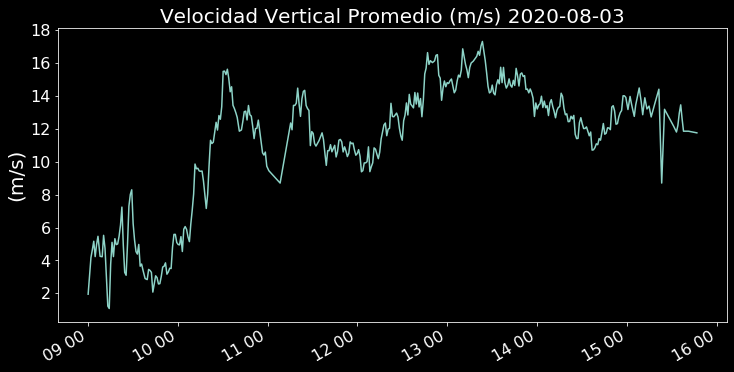

Range array shape:  (3988,)


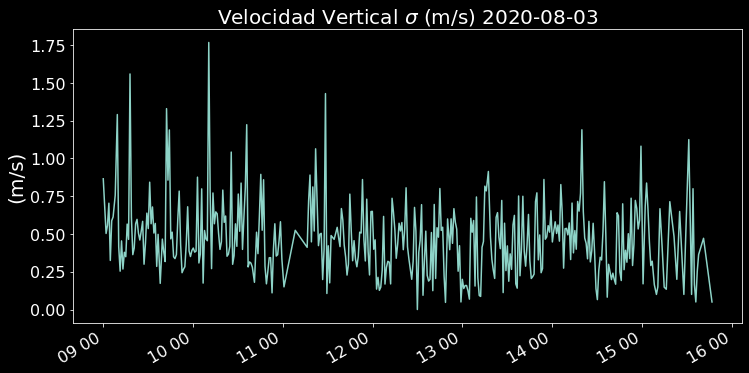

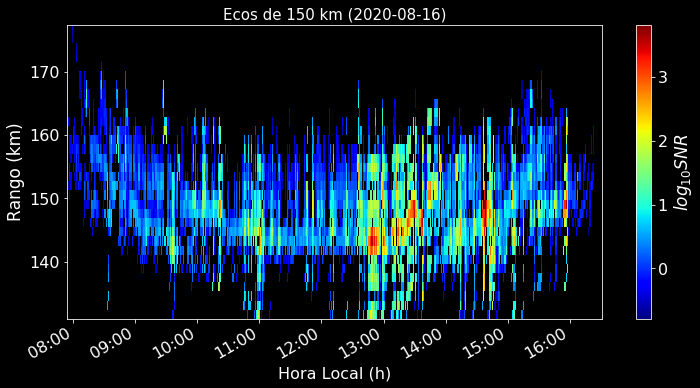

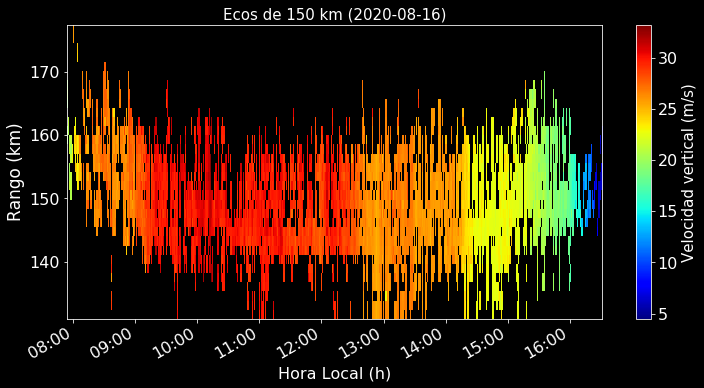

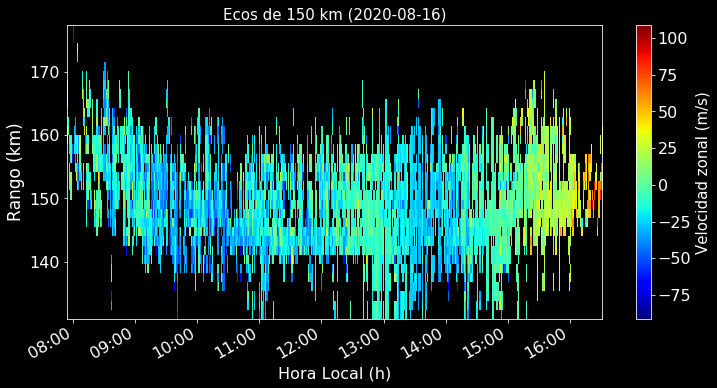

473
Vertical Average shape:  (473,) (473,) 2020-08-16 07:54:02 2020-08-16 16:31:15


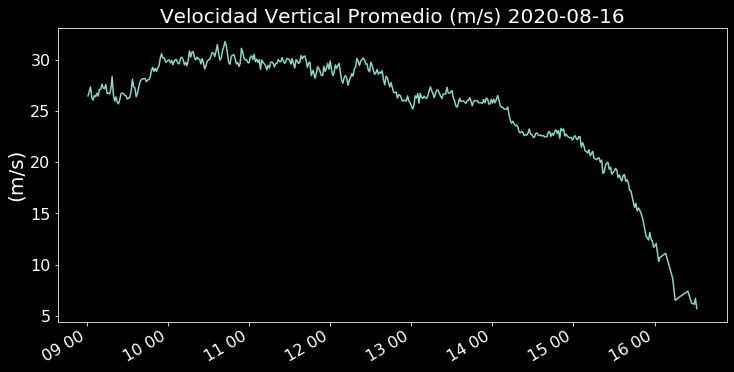

Range array shape:  (5158,)


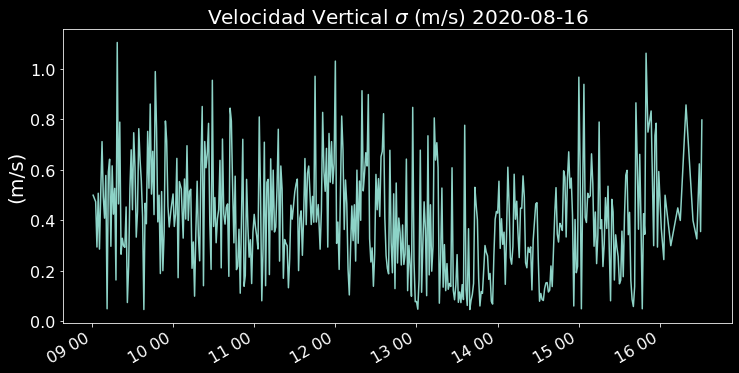

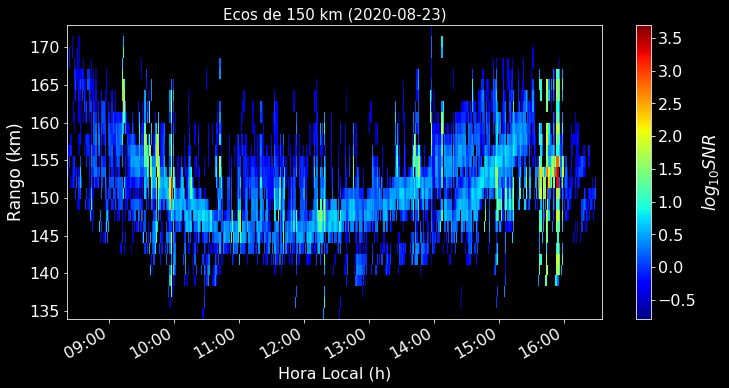

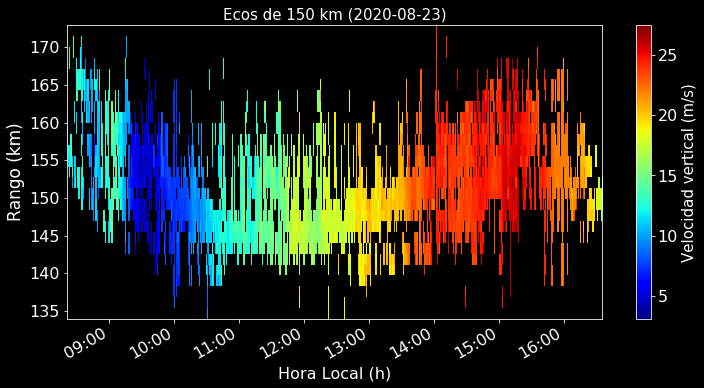

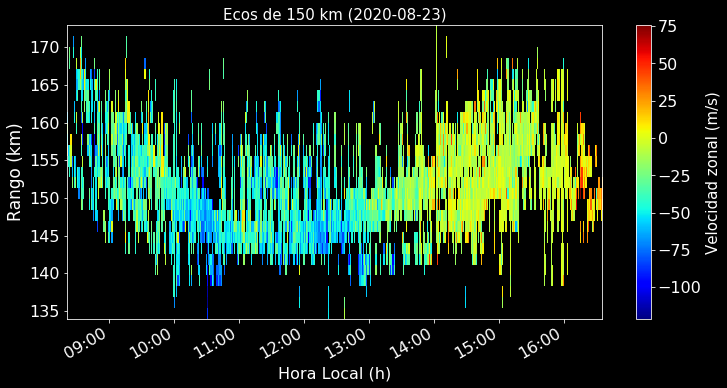

471
Vertical Average shape:  (471,) (471,) 2020-08-23 08:20:43 2020-08-23 16:35:23


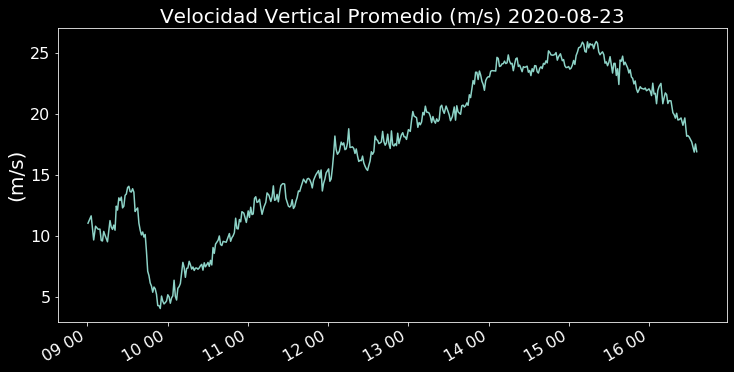

Range array shape:  (3994,)


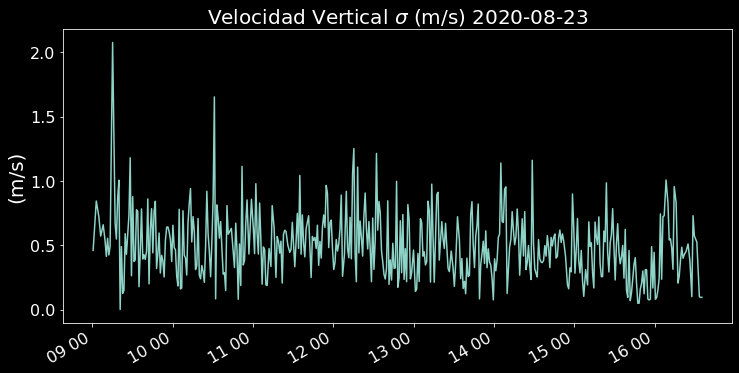

In [21]:
#'''
PlotFlag = True
plot_format= 'png'
h_min = []
h_max = []
frames_avg = []
frames_std = []
num_stamps = []
t_h_min = []
t_h_max = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        #print(os.path.join(directory, filename))
        data ,snl, index, range_array, rango, dir_plots, time_vector, v_zonal, v_vertical, rango2D, timestamps, snl2 = GetMatrix(directory, filename, PlotFlag, plot_format)
        #print(data.shape, len(snl), index.shape, range_array.shape, len(rango))
        prev_times = [' ']
        k = 0
        for time in index:
            if prev_times[k] == time:
                   print('Same Time')
            else:
                #print 'Different time'
                if not time in prev_times:
                    prev_times.append(time)
                prev_time = time

        h_min.append(min(rango))
        h_max.append(max(rango))
    ###########################################################
        ran_max = max(rango)
        ran_min = min(rango)
        #rang_list = list(rango)
        max_index = rango.index(ran_max)
        min_index = rango.index(ran_min)
        t_h_min.append(index[min_index].to_pydatetime())
        t_h_max.append(index[max_index].to_pydatetime())
    ############################################################
        num_stamps.append(len(timestamps))
        prev_times = prev_times[1:]
        num_diff_times = len(prev_times)
        print(num_diff_times)
        new_index = pd.DatetimeIndex(prev_times)
        v_vert_avg = np.nanmean(v_vertical,axis=1)
        v_vert_std = np.nanstd(v_vertical,axis=1)
        print("Vertical Average shape: ", v_vert_avg.shape, new_index.shape, new_index[0], new_index[-1])
        fig, ax = plt.subplots(figsize=(12, 6))
        str_date = '%d-%02d-%02d' % (new_index[0].year,new_index[0].month,new_index[0].day)
        str_format = 'png'
        v_vert_avg = np.nanmean(v_vertical,axis=1)
        v_vert_std = np.nanstd(v_vertical,axis=1)
        #df_std = pd.Series(v_vert_std, index=new_index)
        df = pd.Series(v_vert_avg, index=new_index)
        #df.set_index(index, inplace=True, drop=True)
        string_t0 = '2020-%02d-%02d %02d:%02d:00' % (new_index[0].month, new_index[0].day, 9,0)
        string_tf = '2020-%02d-%02d %02d:00:00' % (new_index[0].month, new_index[0].day, 17)
        ax = df[string_t0:string_tf].plot()
        ax.set_ylabel('(m/s)', fontsize=20)
        ax.set_title('Velocidad Vertical Promedio (m/s) %s' % str_date, fontsize=20)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H %M'))
        plt.savefig('velocidad-vertical-promedio-%s.%s' % (str_date, str_format))
        plt.show()
        plt.close(fig)
        print("Range array shape: ", np.array(rango).shape)
        fig1, ax1 = plt.subplots(figsize=(12, 6))
        #str_date = '%d-%02d-%02d' % (new_index[0].year,new_index[0].month,new_index[0].day)
        #str_format = 'png'
        #v_vert_avg = np.nanmean(v_vertical,axis=1)
        #v_vert_std = np.nanstd(v_vertical,axis=1)
        df_std = pd.Series(v_vert_std, index=new_index)
        #df = pd.Series(v_vert_avg, index=new_index)
        #df.set_index(index, inplace=True, drop=True)
        ax1 = df_std[string_t0:string_tf].plot()
        ax1.set_ylabel('(m/s)', fontsize=20)
        ax1.set_title(r'Velocidad Vertical $\sigma$ (m/s) %s' % str_date, fontsize=20)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H %M'))
        plt.savefig('velocidad-vertical-desviacion-estandar-%s.%s' % (str_date, str_format))
        plt.show()
        plt.close(fig)
        frames_avg.append(df[string_t0:string_tf])
        frames_std.append(df_std[string_t0:string_tf])
#'''

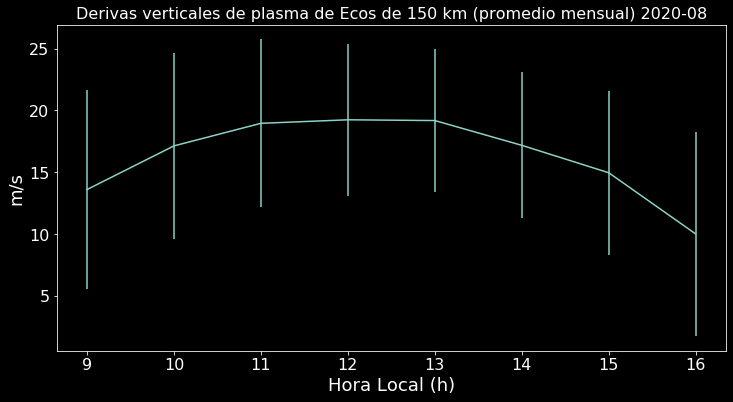

In [22]:
#'''
series_avg = pd.concat(frames_avg)
series_std = pd.concat(frames_std)
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
#plt.style.use('seaborn-white')#'ggplot')#'classic')
series_avg.groupby(series_avg.index.hour).mean().plot(yerr=series_avg.groupby(series_std.index.hour).std(),rot=0,ax=axs)
fig_title = 'Derivas verticales de plasma de Ecos de 150 km (promedio mensual) 2020-%02d' % (day_index[0].month)
axs.set_title(fig_title, fontsize=16)
#axs.set_facecolor("white")

#axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs.set_xlabel('Hora Local (h)', fontsize=18)
axs.set_ylabel('m/s', fontsize=18)
#axs.set_xlim([100,400])

plt.savefig('promedio-mensual-drifts-agosto-2020.pdf')
#'''

2020-08-15 11:30:49


Text(0, 0.5, 'Altitud (km)')

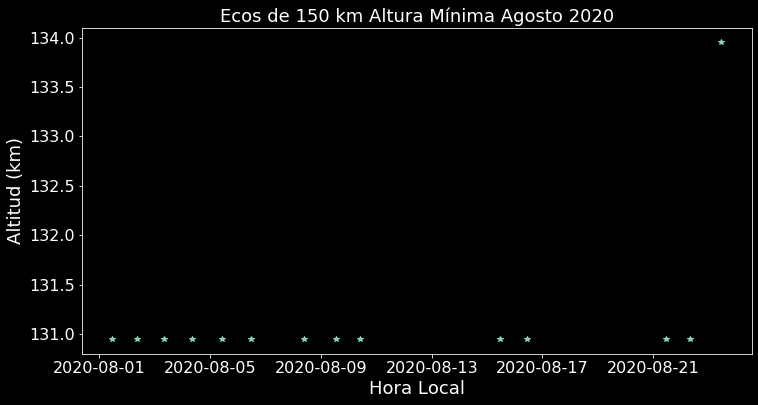

In [23]:
#'''
#plt.plot(t_h_min,h_min)
#dt_h_min = []#t_h_min.to_datetime()
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
#print(type(t_h_min[0]))
fig_title = 'Ecos de 150 km Altura Mínima Agosto 2020'# % (new_index[0].month)
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")
plt.plot(t_h_min, h_min,'*')
print(t_h_min[0])
#'%Y-%m-%d %H:%M:%S'
#axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel('Altitud (km)', fontsize=18)
#axs.set_xlim([100,400])

#for th in t_h_min:
#    dt_h_min.append(th.to_pydatetime())
#'''

2020-08-03 08:29:44
5294
564


Text(0, 0.5, 'Número de Timestamps')

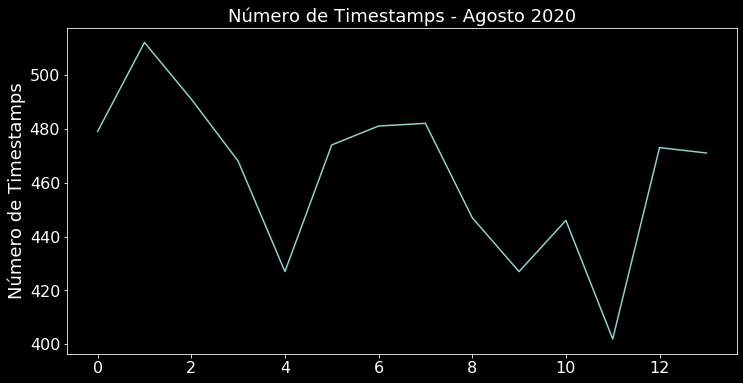

In [24]:
#day_avgs = series_avg.groupby(pd.TimeGrouper('1H'))
#days_avg = pd.Grouper(key = index, freq = '1H')
#days_avg
#'''
print(datetime_objects[1])
print((datetime_objects[1]-datetime_objects[0]).seconds)
print((datetime_objects[2]-datetime_objects[1]).seconds)
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
#plt.hist(num_stamps)
plt.plot(num_stamps)
fig_title = "Número de Timestamps - Agosto 2020"
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

#axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_ylabel('Número de Timestamps', fontsize=18)
#axs.set_xlim([10
#'''

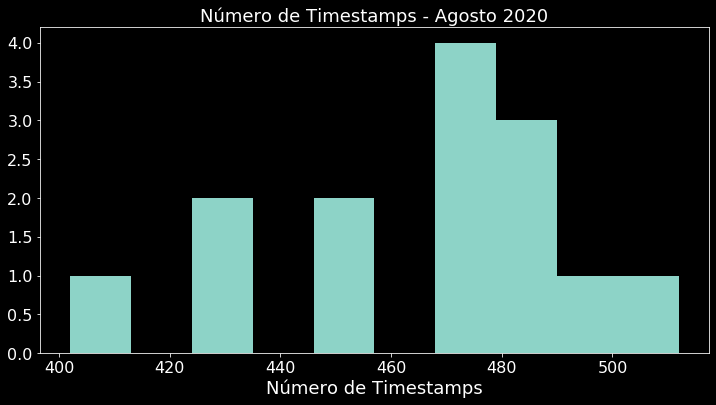

In [25]:
#'''
fig, axs = plt.subplots(figsize=(12, 6))
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.labelsize']=16
#plt.hist(num_stamps)
plt.hist(num_stamps)
fig_title = "Número de Timestamps - Agosto 2020"
axs.set_title(fig_title, fontsize=18)
#axs.set_facecolor("white")

#axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#axs.set_xlabel('Hora Local', fontsize=18)
axs.set_xlabel('Número de Timestamps', fontsize=18)
#axs.set_xlim([10
#
plt.savefig('numero-timestamps-2020-%02d.%s' % (day_index[0].month, str_format))
#'''

In [26]:
#plt.hist(h_max)
#h_max

In [27]:
#plt.plot(h_min)
#h_min